In [71]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('acc')>0.998):
      print('\nReached 99.9 accuracy so cancelling training!')
      self.model.stop_training = True

callback = myCallback()

--2019-05-15 16:08:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-05-15 16:08:26 (145 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
# Directory with our training horse pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

# Directory with our training human pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

In [73]:
train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

['sad1-09.png', 'sad2-17.png', 'sad2-08.png', 'sad2-16.png', 'sad1-08.png', 'sad1-17.png', 'sad1-04.png', 'sad2-04.png', 'sad2-06.png', 'sad2-01.png']
['happy2-10.png', 'happy2-00.png', 'happy1-13.png', 'happy2-03.png', 'happy2-17.png', 'happy1-05.png', 'happy2-02.png', 'happy2-04.png', 'happy1-01.png', 'happy1-10.png']


In [74]:
print('total training sad images:', len(os.listdir(train_sad_dir)))
print('total training happy images:', len(os.listdir(train_happy_dir)))

total training sad images: 40
total training happy images: 40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

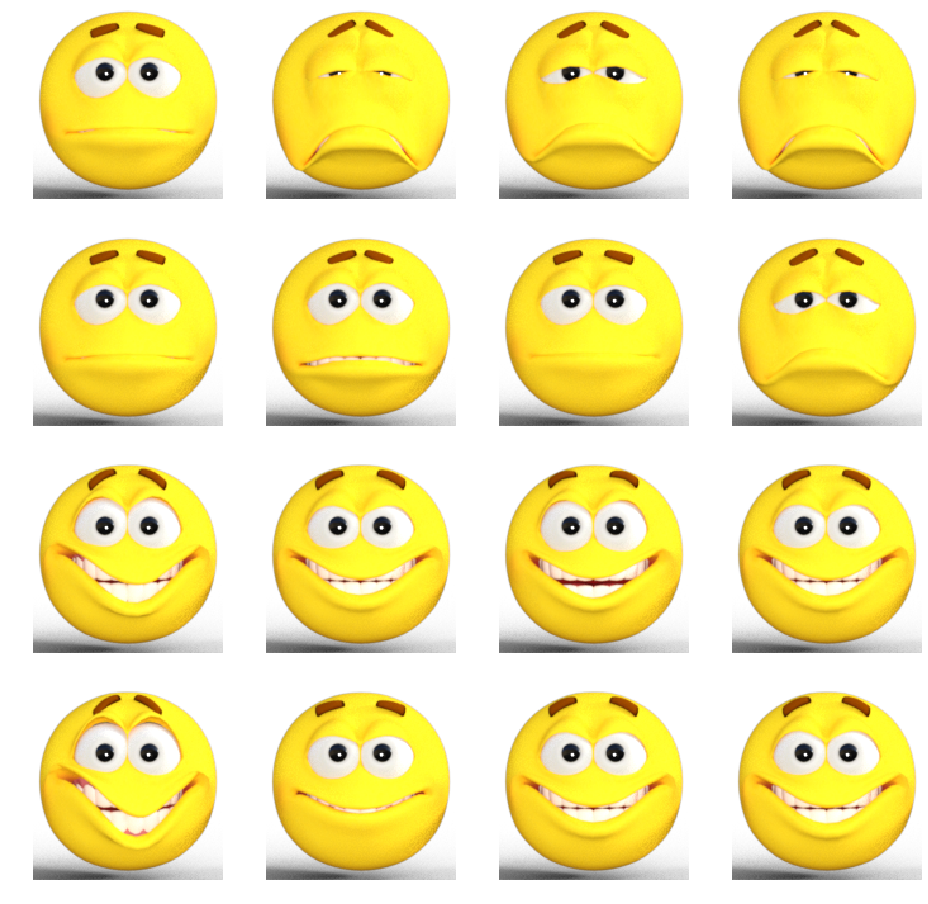

In [76]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'],)

In [78]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(300,300),
        batch_size=16,
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [79]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
        train_generator,
        steps_per_epoch=7,
        epochs=15,
        verbose=1,
        callbacks=[callback])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
5/5 [==============================] - 1s 105ms/step - loss: 1.2707 - acc: 0.5500
Epoch 2/15
5/5 [==============================] - 0s 76ms/step - loss: 0.6910 - acc: 0.5125
Epoch 3/15
5/5 [==============================] - 0s 62ms/step - loss: 0.5147 - acc: 0.8500
Epoch 4/15
5/5 [==============================] - 0s 76ms/step - loss: 0.5143 - acc: 0.7875
Epoch 5/15
5/5 [==============================] - 0s 80ms/step - loss: 0.1761 - acc: 0.9000
Epoch 6/15
5/5 [==============================] - 0s 79ms/step - loss: 0.0767 - acc: 0.9750
Epoch 7/15
5/5 [==============================] - 0s 80ms/step - loss: 0.0726 - acc: 0.9375
Epoch 8/15
5/5 [==============================] - 0s 63ms/step - loss: 0.0845 - acc: 0.9750
Epoch 9/15
4/5 [=======================>......] - ETA: 0s - loss: 0.0141 - acc: 1.0000
Reached 99.9 accuracy so cancelling training!


NameError: ignored